Integrantes:


  Bryan Antonio Santillán Fernández

  David García Figueroa

  Natalia La Rosa Montero

  Javier Rodríguez Luque

In [13]:
import xlrd
filePath="/content/DatosPL1IA.xlsx" #para importar los datos dele excel se debe subir y proporcionar la ruta
openFile = xlrd.open_workbook(filePath)
sheet = openFile.sheet_by_name("Hoja1")

for i in range(sheet.nrows):
  print(sheet.cell_value(i,0), "      ", sheet.cell_value(i,1), "      ", sheet.cell_value(i,2), "      ", sheet.cell_value(i,3), "      ", sheet.cell_value(i,4),"      ", sheet.cell_value(i,5),"      ", sheet.cell_value(i,6),"      ", sheet.cell_value(i,7))

4361.19                                                        
4391.34        0.0069132507411969095        1.0                                        
4399.76        0.00191741017548176        1.0        0.0069132507411969095                                
4363.55        -0.008229994363328916        1.0        0.00191741017548176        0.0069132507411969095                        
4345.72        -0.004086122537841878        1.0        -0.008229994363328916        0.00191741017548176        0.0069132507411969095                
4300.46        -0.010414844950894262        1.0        -0.004086122537841878        -0.008229994363328916        0.00191741017548176        0.0069132507411969095        
4357.04        0.013156732070522672        1.0        -0.010414844950894262        -0.004086122537841878        -0.008229994363328916        0.00191741017548176        0.0069132507411969095
4307.54        -0.011360923930007528        1.0        0.013156732070522672        -0.010414844950894262

1. De	cuantos	parámetros	consta	el	modelo? (1	punto)
    
    
    a. Cinco
    b. Seis


In [93]:
from scipy.ndimage.interpolation import shift
import numpy as np

q= sheet.col_values(1, 6, 252)#lista 

y= np.array(q)

c1 = sheet.col_values(2, 6, 252)
c2 = sheet.col_values(3, 6, 252)
c3 =  sheet.col_values(4, 6, 252)
c4 =  sheet.col_values(5, 6, 252)
c5 = sheet.col_values(6, 6, 252)
c6 = sheet.col_values(7, 6, 252)

aux1 = np.vstack((c1,c2)) 
aux2 = np.vstack((aux1,c3))
aux3 = np.vstack((aux2,c4))
aux4 = np.vstack((aux3,c5))
aux5 = np.vstack((aux4,c6))


X = aux5.T #ndarray


param= np.linalg.inv(X.T @ X) @ ( X.T @ y)
print(param)



[-0.00094661 -0.05337461  0.0281816  -0.12649678 -0.00756121 -0.04659978]


3. Las	 tres	 métricas,	 proporcionan	 los	 mismos	 resultados	 (el	 mismo	 valor)? (2
puntos)
    
    a. Si

    b. No

In [94]:
import matplotlib.pylab as plt
predicc= X@param




mse = np.mean((y-predicc)**2)
mae = np.mean(np.abs(y-predicc))

mape = np.mean(np.abs((y-predicc)/y))*100

print(mse)

print(mae)

print(mape)

7.162452295396373e-05
0.006317537667890133
124.10833790583875


4. Suponga	 que	 comparamos	 las	 predicciones	 frente	 a	 un	 paseo	 aleatorio	 rt=0
empleando	el	mape,	las	predicciones	del	modelo	lineal	son	mejores?	(2	puntos)
    
    a. Si
    
    b. No

In [73]:
Yzeros = np.zeros(246)
mape_paseo_aleat = np.mean(np.abs((y-Yzeros)/y)) * 100
print(mape_paseo_aleat)

100.0


5. El	valor	del	parámetro	correspondiente	al	tercer	regresor	varia? (2	puntos)


  a. Si

  b. No
  
Explicar	en	ocho	líneas	los	resultados

In [98]:
from scipy.ndimage.interpolation import shift
import numpy as np
from numpy.linalg import inv
WIN_SIZE = 30
indice = 0

ultimo = len(y)
thetasw= []
num_vars = X.shape[1]

while indice + WIN_SIZE < ultimo:
  Xw = X[indice:indice + WIN_SIZE, :]
  yw = y[indice:indice + WIN_SIZE]
 
  thetaw = inv(Xw.T @ Xw ) @ (Xw.T @ yw)
  thetasw.append(thetaw)
  indice += 1

thetasw = np.array(thetasw).reshape((-1,num_vars))

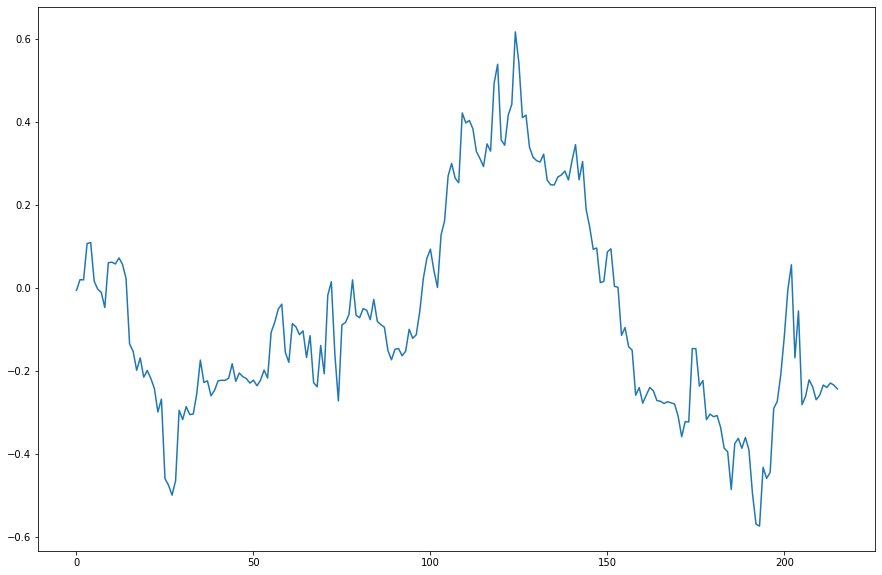

In [96]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,10))
plt.plot(thetasw[:,4])


6. es	dicha	rentabilidad	positiva? (2	puntos)
   
    a. Si
   
    b. No

In [97]:
sumarentw= 0
indice2 = 0

while indice2 + WIN_SIZE < ultimo:
  Xw = X[indice2 +WIN_SIZE-1, :]
  yw = y[indice2 + WIN_SIZE-1]

  prediccw= thetaw.T@Xw
  rentabw = prediccw- yw
  sumarentw= sumarentw +rentabw
  indice2 +=1
print(sumarentw)


-0.017173785181468754
